In [1]:
# # Library includes

# In[1]:


import numpy as np
import pandas as pd
import sys
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

In [2]:
path1 = '/home/partha/Desktop/MTP/Data/'


# # Read data

# In[3]:


category_tree = pd.read_csv(path1 + 'category_tree.csv')
events = pd.read_csv(path1 + 'events.csv')
item_properties_part1 = pd.read_csv(path1 + 'item_properties_part1.csv')
item_properties_part2 = pd.read_csv(path1 + 'item_properties_part2.csv')

(69332, 22457)

In [57]:
events[(events.itemid == 54058) & (events.visitorid == 350566)].sort_values(["timestamp"])

,timestamp,visitorid,event,itemid,transactionid
17290,1433184061334,350566,view,54058,NaN
9538,1433184109097,350566,addtocart,54058,NaN
1214,1433184261340,350566,transaction,54058,8796.0


In [3]:
item_properties_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
timestamp    int64
itemid       int64
property     object
value        object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


In [3]:
item_properties_part1[["timestamp","itemid"]] = item_properties_part1[["timestamp","itemid"]].apply(pd.to_numeric, downcast="integer")
item_properties_part2[["timestamp","itemid"]] = item_properties_part2[["timestamp","itemid"]].apply(pd.to_numeric, downcast="integer")


# # Data Wrangling

# In[7]:


view_events = events[events["event"] == "view"]
addtocart_events = events[events["event"] == "addtocart"]
transaction_events = events[events["event"] == "transaction"]

In [4]:
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)

In [5]:
pd.concat([events[15:20], transaction_events[:2]], axis = 0).reset_index(drop=True)


# # Exploratory analysis

# In[10]:


df = category_tree.groupby(["parentid"], as_index=False)
#df.groups

In [8]:
category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [8]:
root_nodes = category_tree[np.isnan(category_tree["parentid"])].categoryid.values
root_nodes

array([ 231,  791, 1490,  431,  755,  378, 1579, 1394,  659, 1057,  859,
        803,  250, 1452, 1182, 1692, 1600, 1482, 1224, 1532,  395,  653,
        140, 1698,  679])

In [9]:
category_tree.categoryid.nunique()

1669

,visitorid,Count
count,1.171900e+04,11719.000000
mean,7.099856e+05,1.916290
std,4.058287e+05,8.850529
min,1.720000e+02,1.000000
50%,7.183140e+05,1.000000
75%,1.062739e+06,1.000000
80%,1.130465e+06,2.000000
85%,1.197018e+06,2.000000
90%,1.267586e+06,2.000000
95%,1.335906e+06,4.000000


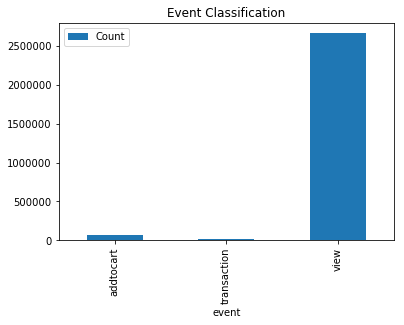

In [7]:
category_tree.categoryid.count()


# In[ ]:


events.columns


# In[ ]:


#events.describe()


# In[ ]:


events.visitorid.nunique()


# In[ ]:


#item_properties.describe()


# In[ ]:


item_properties.head()


# In[ ]:


item_properties_part1.columns


# In[ ]:


item_properties.itemid.nunique()


# In[ ]:


item_properties.itemid.max()


# In[ ]:


item_ids = np.sort(item_properties.itemid.unique())


# In[ ]:


item_properties.timestamp.nunique()


# In[ ]:


item_properties.property.nunique()


# In[ ]:


item_properties[(item_properties.property == "888")]#.timestamp.nunique()#timestamp == 1431226800000)]'''(item_properties.itemid == 1)]# &'''


# In[ ]:


#test_df = item_properties.sort_values(["timestamp", "itemid"])
#test_df_item1[test_df_item1["timestamp"] == 1431226800000]
#test_df


# In[ ]:


#item_properties_part1.sort_values(["timestamp", "itemid"])


# In[ ]:


#item_properties_part2.sort_values(["timestamp", "itemid"])


# In[ ]:


events[events.visitorid == 257597]


# # Descriptive statistics

# ### Events distribution

# In[8]:


event_frequency = events.groupby("event", as_index=False).size().reset_index(name="Count")
event_frequency.plot.bar(x="event", y="Count");
plt.title("Event Classification");


# Serves as validation of data relevant to field. Confirms with genral observation.

# In[9]:


event_percent = event_frequency
event_percent["count%"] = event_frequency.Count*100/event_frequency.Count.sum()
event_percent = event_percent[["event", "count%"]]
event_percent


# Clearly, majority of the visitors view products online, very few add items to cart for buying and even fewer customers actually do a transaction.

# ### Customers who do transaction

# In[10]:


transaction_per_visitor = transaction_events.groupby("visitorid", as_index=False).size().reset_index(name="Count")
transaction_per_visitor.describe(percentiles=[0.75, 0.80, 0.85, 0.9, 0.95, 0.99])

In [8]:
transaction_groups = {}
transaction_groups["first timers"] = transaction_per_visitor[transaction_per_visitor.Count == 1].Count.count()
transaction_groups["medium frequency"] = transaction_per_visitor[(transaction_per_visitor.Count < 13) & (transaction_per_visitor.Count > 1)].Count.count()
transaction_groups["high frequency"] = transaction_per_visitor[transaction_per_visitor.Count >= 13].Count.count();

#transaction_groups.values()

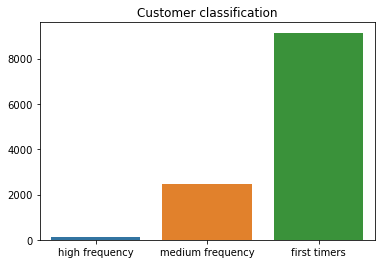

In [12]:
sns.barplot(transaction_groups.keys(), transaction_groups.values());
plt.title("Customer classification");


# Outlier removal

# In[13]:


high_frequency_group = transaction_per_visitor[transaction_per_visitor.Count >= 13]

In [13]:
transaction_events[transaction_events.visitorid == 42552]


# A basket can be identified with a unique transactionid per user in the same time stamp.

# In[13]:


#a= transaction_events[transaction_events.visitorid == 170470].itemid.values
#transaction_events[transaction_events.visitorid == 170470]

,timestamp,visitorid,event,itemid,transactionid
1253698,1441598929376,42552,transaction,150426,539.0
1256422,1441598929188,42552,transaction,334401,539.0
1256438,1441598929360,42552,transaction,234207,539.0
1256456,1441598929610,42552,transaction,124006,539.0
1258592,1441598929360,42552,transaction,49673,539.0
1264348,1441598930345,42552,transaction,236862,539.0
1264353,1441598929423,42552,transaction,185616,539.0
1751926,1431880919961,42552,transaction,349273,9885.0
1759686,1431880920072,42552,transaction,302569,9885.0
1759689,1431880919961,42552,transaction,295266,9885.0


In [ ]:
#b = addtocart_events[addtocart_events.visitorid == 170470].itemid.values
#addtocart_events[addtocart_events.visitorid == 170470]

In [9]:
#item_properties[(item_properties.itemid == 76831)]# & (item_properties.property == "available")]


# ### Histogram of basket size per transaction

# In[11]:


basket_itemCount = transaction_events.groupby(["transactionid"], as_index=False)["itemid"].size().reset_index(name="itemCount")

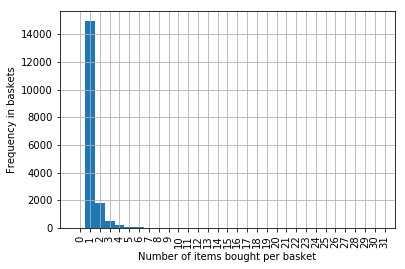

In [15]:
basket_itemCount.describe(percentiles=[0.80, 0.9, 0.95, 0.99])


# Most of the baskets contain only single item and hence donot give much insight.

# #### Baskets can be divided into different sizes

# In[16]:


basket_itemCount.itemCount.hist(bins=np.arange(32)-0.5, xrot=90);
plt.xlabel("Number of items bought per basket");
plt.ylabel("Frequency in baskets");
plt.xticks(range(32));

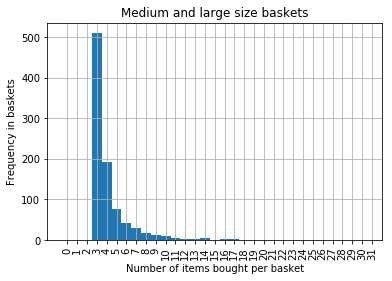

In [16]:
multiple_basket_itemCount = basket_itemCount[basket_itemCount["itemCount"] > 2]
multiple_basket_itemCount["itemCount"].hist(bins=np.arange(32)-0.5, xrot=90)
plt.xlabel("Number of items bought per basket")
plt.ylabel("Frequency in baskets")
plt.xticks(range(32));
plt.title("Medium and large size baskets");

In [10]:
def basketClassification(item):
    ''' 
    Baskets are classified by size as:
    0. Very big baskets: more than 9
    1. Big baskets: more than 4 and less than equal to 9
    2. Medium baskets: Greater than 2 and less than equal to 4
    3. Small baskets: Less than equal to 2
    '''
    if item > 9:
        return "VeryBig"
    elif item > 4 and item <= 9:
        return "Big"
    elif item > 2 and item <= 4:
        return "Medium"
    elif item <= 2:
        return "Small"

In [11]:
basket_itemCount["basketType"] = basket_itemCount.itemCount.apply(basketClassification)

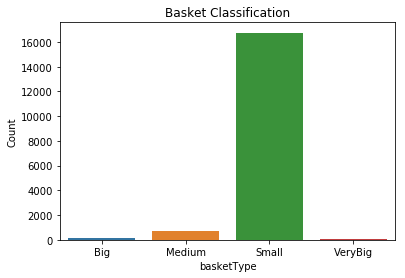

In [19]:
basketTypes = basket_itemCount.groupby(["basketType"], as_index=False).size().reset_index(name="Count")
sns.barplot(x=basketTypes.basketType,y=basketTypes.Count);
plt.title("Basket Classification");

In [20]:
basketTypes


# #### Mapping baskets to customers

# In[38]:


transaction_events.columns

Index([u'timestamp', u'visitorid', u'event', u'itemid', u'transactionid'], dtype='object')

In [15]:
customer_basket = transaction_events[["visitorid", "transactionid"]].drop_duplicates().reset_index(drop=True)
customer_basket = pd.merge(customer_basket, basket_itemCount, on="transactionid")

In [16]:
customer_basket.visitorid.nunique()


# #### Exploring taxonomy

# In[15]:


levels = {}
i = 0

In [17]:
relationship_tree = category_tree.copy()

In [18]:
while len(relationship_tree.categoryid.values) != 0:
    levels[i] = relationship_tree[relationship_tree.parentid.isnull()].categoryid.values
    relationship_tree = relationship_tree[relationship_tree.parentid.notnull()]
    parents = relationship_tree.parentid.values
    for x in xrange(len(parents)):
        if parents[x] in levels[i]:
            parents[x] = np.nan
    relationship_tree["parentid"] = parents
    i = i+1;    

In [19]:
# Number of nodes at each level
num_levels = i
#sum = 0
for j in xrange(num_levels):
    print "Level "+str(j)+": "+str(len(levels[j]))
    #sum += len(levels[j])
#sum


# #### Choosing optimal taxonomy

# In[ ]:


#The root level of each item is chosen to be used for further clustering


# #### Fixing taxonomy level for each item

# In[114]:


#chosen level:0

Level 0: 25
Level 1: 174
Level 2: 702
Level 3: 665
Level 4: 90
Level 5: 13


In [20]:
item_category = item_properties[item_properties.property == "categoryid"]#[["itemid", "value"]]

In [21]:
item_category["categoryid"] = item_category.value
item_category = item_category.drop("value", axis=1).reset_index(drop=True)

/home/partha/anaconda/envs/analytics_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
item_category[item_category.itemid == 281245]

,timestamp,itemid,property,categoryid
1,1432436400000,281245,categoryid,1277
7686,1431226800000,281245,categoryid,1277
15399,1431831600000,281245,categoryid,1277
23066,1437274800000,281245,categoryid,1277
30735,1436670000000,281245,categoryid,1277
38292,1434250800000,281245,categoryid,1277
45876,1436065200000,281245,categoryid,1277
53443,1439694000000,281245,categoryid,1277
61052,1435460400000,281245,categoryid,1277
68703,1438484400000,281245,categoryid,1277


In [ ]:
1277 in levels[2]

In [ ]:
438 in levels[2]

In [ ]:
category_tree[category_tree.categoryid == 438]

In [ ]:
category_tree[category_tree.categoryid == 1277]

In [ ]:
item_category[item_category.itemid == 76151]

In [ ]:
category_tree[category_tree.categoryid == 1085]

In [ ]:
1228 in levels[3]

In [22]:
def map2rootcategory(id_):
    '''Function to map a categoryid at any level to its root categoryid'''
    #print id_
    parent = category_tree[category_tree.categoryid == int(id_)].parentid.values
    if len(parent) != 0:
        parent = parent[0]
    else:
        return np.nan
    while( np.isnan(parent) == False ):
        id_ = parent
        parent = category_tree[category_tree.categoryid == id_].parentid.values[0]
    return id_

In [ ]:
map2rootcategory(1228)

In [ ]:
levels[0]

In [23]:
item_category = item_category.drop(["timestamp", "property"], axis=1).drop_duplicates()

In [ ]:
item_category.count()

In [24]:
#Subset of item categories considering only the 1st category id as others would also have the same root
item_category = item_category.drop_duplicates(subset="itemid")

In [25]:
item_category = item_category.set_index("itemid")
item_category = item_category.T.to_dict('list')

In [26]:
transaction_items = transaction_events[["itemid", "transactionid"]].reset_index(drop=True)

In [27]:
def categoryfromitem(item):
    #print item
    #print item_category[item]
    if(item_category.get(item, -1) != -1):
        return int(item_category[item][0])
    else:
        return np.nan

In [28]:
transaction_items["categoryid"] = transaction_items.itemid.apply(categoryfromitem)

In [29]:
ghost_items = transaction_items[transaction_items.categoryid.isnull()].itemid.values

In [30]:
category_tree[category_tree.categoryid == ghost_items[-1]]

,categoryid,parentid


In [31]:
transaction_items = transaction_items[transaction_items.categoryid.notnull()]

In [32]:
transaction_items["rootcategoryid"] = transaction_items.categoryid.apply(map2rootcategory)

In [42]:
transaction_items.head()

,itemid,transactionid,categoryid,rootcategoryid
0,356475,4000.0,386.0,140.0
1,15335,11117.0,1098.0,140.0
2,81345,5444.0,1393.0,140.0
3,150318,13556.0,1236.0,1600.0
4,310791,7244.0,437.0,653.0


In [33]:



# #### Creating factor table

# In[31]:


root_categories = transaction_items.rootcategoryid.values

In [34]:
for x in root_categories:
    transaction_items[x] = (transaction_items.rootcategoryid == x)

In [45]:
transaction_items.columns

Index([        u'itemid',  u'transactionid',     u'categoryid',
       u'rootcategoryid',             140.0,            1600.0,
                   653.0,            1224.0,             395.0,
                   859.0,            1698.0,            1482.0,
                  1532.0,             250.0,             679.0,
                   791.0,            1579.0,            1490.0,
                   803.0,             378.0,            1452.0,
                   431.0],
      dtype='object')

In [35]:
frequency_table = transaction_items.drop(["itemid", "categoryid", "rootcategoryid"], axis=1)

In [47]:
frequency_table[frequency_table.transactionid==11117]

,transactionid,140.0,1600.0,653.0,1224.0,395.0,859.0,1698.0,1482.0,1532.0,250.0,679.0,791.0,1579.0,1490.0,803.0,378.0,1452.0,431.0
1,11117.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37,11117.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72,11117.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,11117.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
138,11117.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
139,11117.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
140,11117.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
141,11117.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,11117.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,11117.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
frequency_table[frequency_table.transactionid==11117].sum()

transactionid    122287.0
140.0                 5.0
1600.0                0.0
653.0                 6.0
1224.0                0.0
395.0                 0.0
859.0                 0.0
1698.0                0.0
1482.0                0.0
1532.0                0.0
250.0                 0.0
679.0                 0.0
791.0                 0.0
1579.0                0.0
1490.0                0.0
803.0                 0.0
378.0                 0.0
1452.0                0.0
431.0                 0.0
dtype: float64

In [36]:
frequency_table = frequency_table.groupby("transactionid", as_index=False).sum()

In [37]:
frequency_table[frequency_table.transactionid ==11117]


# Instead of 0-1 values as mentioned in the paper, my frequency table has the number of items(frequency) of a particular product category( taxonomy: rootid) in each basket.

# In[35]:


factor_table = frequency_table.set_index("transactionid")
factor_table = factor_table.applymap(lambda x: 1 if x > 0 else 0)

In [51]:
factor_table.loc[[11117]]

,140.0,1600.0,653.0,1224.0,395.0,859.0,1698.0,1482.0,1532.0,250.0,679.0,791.0,1579.0,1490.0,803.0,378.0,1452.0,431.0
transactionid,,,,,,,,,,,,,,,,,,
11117,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# #### Clustering

# KMeans

# In[75]:


from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




In [39]:
# #### Determine number of clusters using Elbow method and Silhoutte score

# In[76]:


#kmeans = KMeans().fit(factor_table)
Nc = range(1,21)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [40]:
sse1 = [kmeans[i].fit(factor_table).inertia_ for i in range(len(kmeans))]
sse2 = [kmeans[i].fit(frequency_table).inertia_ for i in range(len(kmeans))]

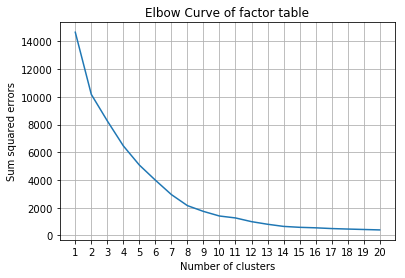

In [44]:
plt.plot(Nc,sse1);
#plt.plot(Nc,sse2);
plt.xlabel("Number of clusters");
plt.ylabel("Sum squared errors");
plt.title("Elbow Curve of factor table");
plt.xticks(range(1,21));
plt.grid();


# By visual inspection, we choose n_cluster = 12

# #### Trying to visualize clusters

# In[115]:



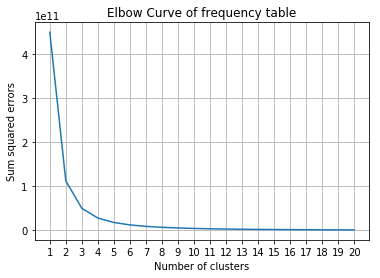

In [45]:
plt.plot(Nc,sse2);
#plt.plot(Nc,sse2);
plt.xlabel("Number of clusters");
plt.ylabel("Sum squared errors");
plt.title("Elbow Curve of frequency table");
plt.xticks(range(1,21));
plt.grid();


# By visual inspection, we choose n_cluster = 12

# #### Trying to visualize clusters

# In[115]:



In [ ]:
'''
pca = PCA(n_components=1).fit(factor_table)
pca_d = factor_table.index
pca_c = pca.transform(factor_table)
plt.scatter(pca_c[:, 0], pca_d, c=kmeans[12].labels_);
'''



In [55]:
# #### Inferences

# In[125]:


kmeans = np.array(KMeans(n_clusters=12).fit_predict(factor_table))
cluster_freq = {}
for x in range(12):
    cluster_freq[x] = (kmeans == x).sum()

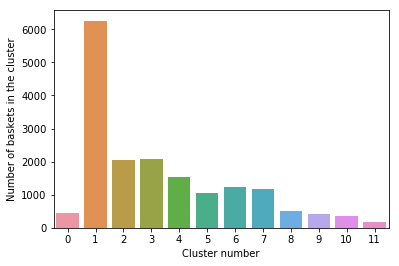

In [56]:
sns.barplot(x=cluster_freq.keys(),y=cluster_freq.values());
plt.xlabel("Cluster number");
plt.ylabel("Number of baskets in the cluster");


# Non uniform distribution in each of the clusters. Possiblity of deriving advantage from such a situation



In [ ]:
# Alternate clustering

# In[51]:


factor_table.sum().sum()*100.0/factor_table.size


# ### K-Means using Hamming distance

# In[73]:


from kmeans import kmeans_hamming


# In[ ]:


#kmeans = KMeans().fit(factor_table)
Nc = range(1,21)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [ ]:
import sys
sys.path.append("home/partha/Desktop/MTP")
print sys.path

In [62]:
# ### Rank order CLustering

# In[40]:
from ROC import cluster, build_index, calculate_symmetric_dist

In [58]:
descriptor_matrix = factor_table.astype("float")

In [59]:
clusters = cluster(descriptor_matrix.values, n_neighbors=18)

Distance calculation time : 33.3215539455
N Clusters: 16788, thresh: 2


In [63]:
app_nearest_neighbors, dists = build_index(descriptor_matrix, n_neighbors=2)
distance_matrix = calculate_symmetric_dist(app_nearest_neighbors)

AttributeError: 'DataFrame' object has no attribute 'dtype'